In [3]:
import pandas as pd
import numpy as np

# 1. Load the dataset
df = pd.read_csv("uber.csv")

# 2. Initial data inspection
print("Initial Shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nSample data:\n", df.head())

# 3. Drop rows with missing values
df.dropna(inplace=True)

# 4. Convert date/time column to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# 5. Feature engineering: extract useful time features
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['weekday'] = df['pickup_datetime'].dt.day_name()

# 6. Define peak hours (example: 7-9 AM and 4-7 PM)
df['peak_hour'] = df['hour'].apply(lambda x: 1 if (7 <= x <= 9 or 16 <= x <= 19) else 0)

# 7. Drop any obviously incorrect values (e.g. negative fares or distances)
df = df[df['fare_amount'] > 0]

# Optional: if trip distance is present
if 'distance' in df.columns:
    df = df[df['distance'] > 0]

# 8. Export cleaned dataset
df.to_csv("cleaned_uber_data.csv", index=False)
print("✅ Cleaned dataset saved as 'cleaned_uber_data.csv'")


Initial Shape: (200000, 9)

Data types:
 Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

Missing values:
 Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

Sample data:
    Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \

In [7]:
import pandas as pd

# Load dataset
df = pd.read_csv("uber.csv")

# Drop missing values
df.dropna(inplace=True)

# Descriptive statistics for fare_amount
fare = df['fare_amount']

# Calculate basic statistics
mean = fare.mean()
median = fare.median()
mode = fare.mode()[0]
std_dev = fare.std()
min_val = fare.min()
max_val = fare.max()
q1 = fare.quantile(0.25)
q3 = fare.quantile(0.75)
iqr = q3 - q1
range_val = max_val - min_val

# Outlier bounds using IQR method
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = df[(fare < lower_bound) | (fare > upper_bound)]

# Print everything
print("📊 DESCRIPTIVE STATISTICS")
print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Mode: {mode:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Minimum Fare: {min_val}")
print(f"Maximum Fare: {max_val}")
print(f"Range: {range_val:.2f}")
print(f"Q1 (25%): {q1:.2f}")
print(f"Q3 (75%): {q3:.2f}")
print(f"IQR (Q3 - Q1): {iqr:.2f}")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")
print(f"Number of Outliers: {outliers.shape[0]}")


📊 DESCRIPTIVE STATISTICS
Mean: 11.36
Median: 8.50
Mode: 6.50
Standard Deviation: 9.90
Minimum Fare: -52.0
Maximum Fare: 499.0
Range: 551.00
Q1 (25%): 6.00
Q3 (75%): 12.50
IQR (Q3 - Q1): 6.50
Lower Bound: -3.75
Upper Bound: 22.25
Number of Outliers: 17166


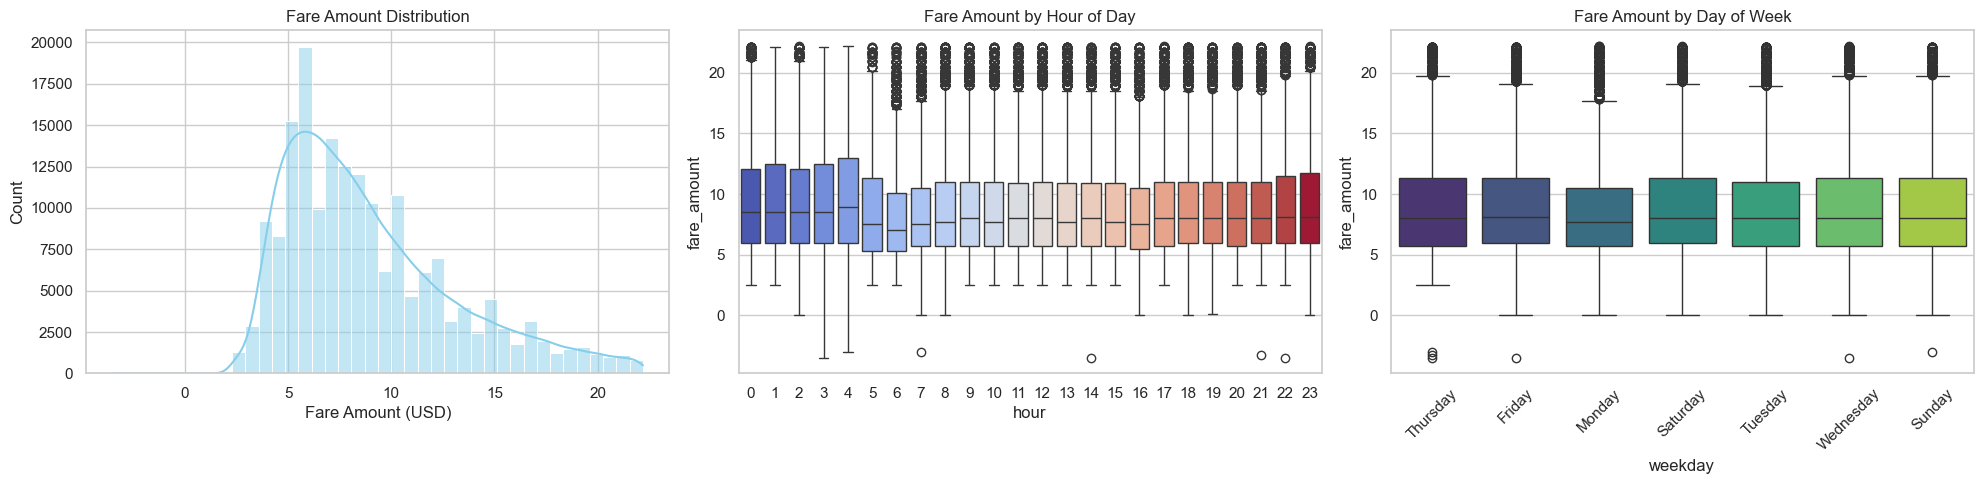

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("uber.csv")

# Drop missing values
df.dropna(inplace=True)

# Convert to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract time features
df['hour'] = df['pickup_datetime'].dt.hour
df['weekday'] = df['pickup_datetime'].dt.day_name()

# Remove outliers using IQR
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['fare_amount'] >= lower_bound) & (df['fare_amount'] <= upper_bound)]

# Set Seaborn style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 5))

# 1. Fare Distribution
plt.subplot(1, 3, 1)
sns.histplot(df_filtered['fare_amount'], bins=40, kde=True, color="skyblue")
plt.title("Fare Amount Distribution")
plt.xlabel("Fare Amount (USD)")

# 2. Fare vs Hour of Day (with hue to avoid warning)
plt.subplot(1, 3, 2)
sns.boxplot(data=df_filtered, x="hour", y="fare_amount", hue="hour", palette="coolwarm", legend=False)
plt.title("Fare Amount by Hour of Day")

# 3. Fare vs Day of Week (with hue to avoid warning)
plt.subplot(1, 3, 3)
sns.boxplot(data=df_filtered, x="weekday", y="fare_amount", hue="weekday", palette="viridis", legend=False)
plt.xticks(rotation=45)
plt.title("Fare Amount by Day of Week")

# Save and show plot
plt.tight_layout()
plt.savefig("uber_fare_analysis_plots.png")
plt.show()


In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. Load the dataset
df = pd.read_csv("uber.csv")

# 2. Drop rows with missing values
df.dropna(inplace=True)

# 3. Convert pickup_datetime to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# 4. Create new features from the timestamp
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['weekday'] = df['pickup_datetime'].dt.day_name()

# 5. Create peak/off-peak time indicators
def classify_peak(hour):
    return "Peak" if 7 <= hour <= 9 or 16 <= hour <= 19 else "Off-Peak"

df['peak_period'] = df['hour'].apply(classify_peak)

# 6. Encode categorical variables
encoder = LabelEncoder()
df['weekday_encoded'] = encoder.fit_transform(df['weekday'])
df['peak_period_encoded'] = encoder.fit_transform(df['peak_period'])

# 7. Save the enhanced dataset
df.to_csv("enhanced_uber_data.csv", index=False)

# 8. Confirm success
print("✅ Enhanced dataset saved as 'enhanced_uber_data.csv'")


✅ Enhanced dataset saved as 'enhanced_uber_data.csv'
